In [43]:
from acquire_zillow import *
from acquire_mall import *
from prepare_mall import *
from prepare_zillow import *
import env


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# image stuff
from IPython.display import display
from PIL import Image

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2 as chi2
from sklearn.feature_selection import SelectKBest


# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

In [13]:
df = sns.load_dataset('tips')

In [14]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [15]:
train, test = train_test_split(df, random_state=42)

In [16]:
stats.ttest_ind(train.total_bill, train.tip)

Ttest_indResult(statistic=25.886435758145854, pvalue=1.528100141216207e-84)

In [17]:
scaler = MinMaxScaler()
num_vars = list(train.select_dtypes('number').columns)

print('Scaling {}, and {}...'.format(', '.join(num_vars[:-1]), num_vars[-1]))
train[num_vars] = scaler.fit_transform(train[num_vars])

train.describe()

Scaling total_bill, tip, and size...


,total_bill,tip,size
count,183.00,183.00,183.00
mean,0.32,0.23,0.31
std,0.20,0.16,0.19
min,0.00,0.00,0.00
25%,0.18,0.11,0.20
50%,0.27,0.22,0.20
75%,0.42,0.29,0.40
max,1.00,1.00,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c16b4f9b0>,
      dtype=object)

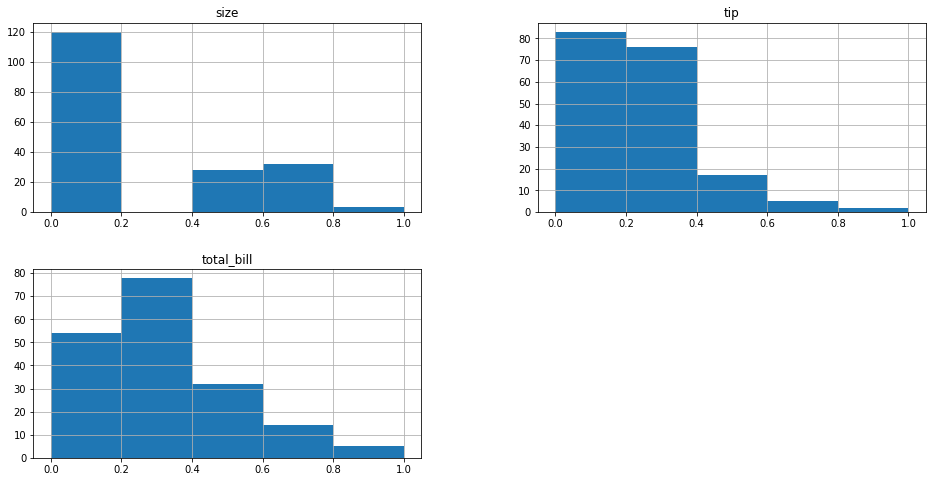

In [18]:
train.hist(figsize=(16, 8), bins=5, log=False)

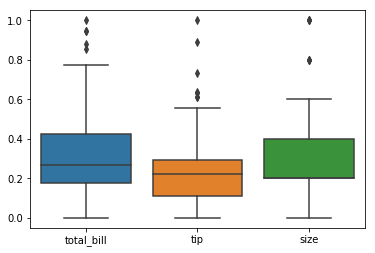

In [19]:
sns.boxplot(data=train)

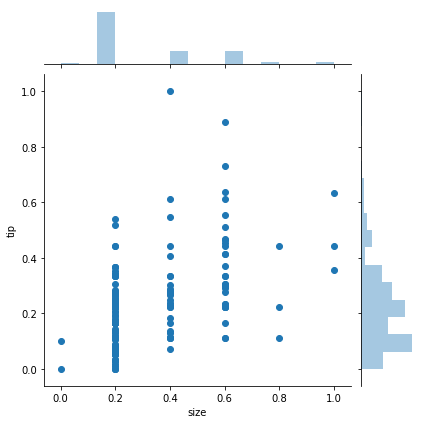

In [21]:
sns.jointplot(x="size", y="tip", data=train)

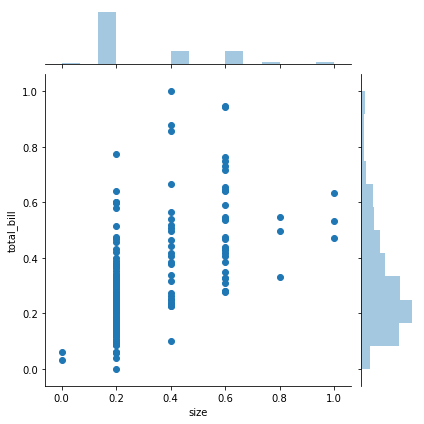

In [24]:
sns.jointplot(x="size", y="total_bill", data=train)


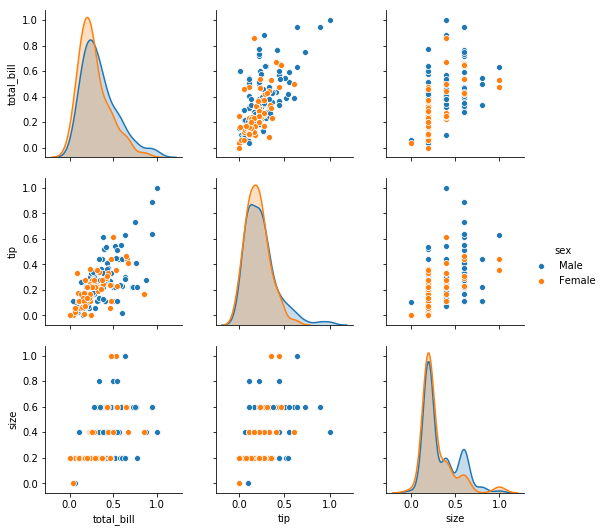

In [26]:
sns.pairplot(train, hue='sex')

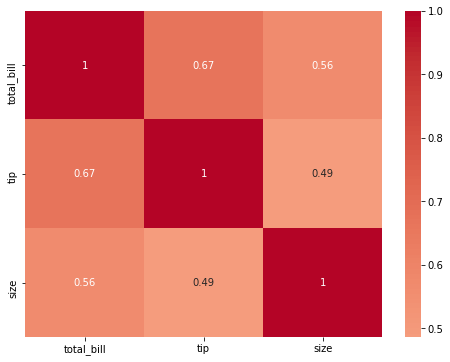

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, center=0)

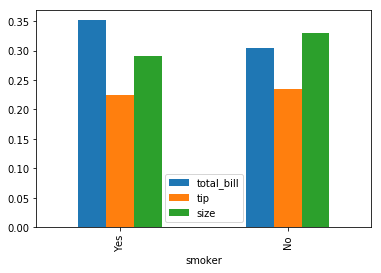

In [29]:
train.groupby('smoker').mean().plot.bar()

In [31]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
115,0.26,0.28,Female,No,Sun,Dinner,0.20
181,0.39,0.52,Male,Yes,Sun,Dinner,0.20
225,0.23,0.17,Female,Yes,Fri,Lunch,0.20
68,0.32,0.11,Male,No,Sat,Dinner,0.20
104,0.34,0.34,Female,No,Sat,Dinner,0.20


In [45]:
to_test = train[['total_bill', 'tip', 'size']]

In [48]:
stat, p, dof, expected = chi2_contingency(to_test)
print(f'stat - {stat}')
print(f'p - {p}')
print(f'dof - {dof}')
# print(f'expected - {expected}')

stat - 15.049432017220427
p - 1.0
dof - 364
